In [ ]:
from scipy import signal as sg
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
K = 0.6
xi = 0.7
wn = 3.2

t = np.linspace(0,0.5,100)
num = K*wn**2
den = [1, 2*xi*wn, wn**2]
Gs = sg.TransferFunction(num, den)

Ts = 0.1 
Gz = sg.cont2discrete((num,den), dt = Ts, method = 'zoh')

: 

In [ ]:
u = 2*(sg.max_len_seq(7)[0]-0.5)
Ns = 5               
v = np.ones(Ns)
u = np.kron(u,v)
N = len(u)
t = Ts*np.arange(0,N)

In [ ]:
# Dados de saída:
y = np.squeeze(sg.dlsim(Gz, u, t = t)[1])

In [ ]:
percIdent = 0.6         # Percentual dos dados de identificação:
Ni = int(percIdent*N)   # Quantidade de amostras para identificação:

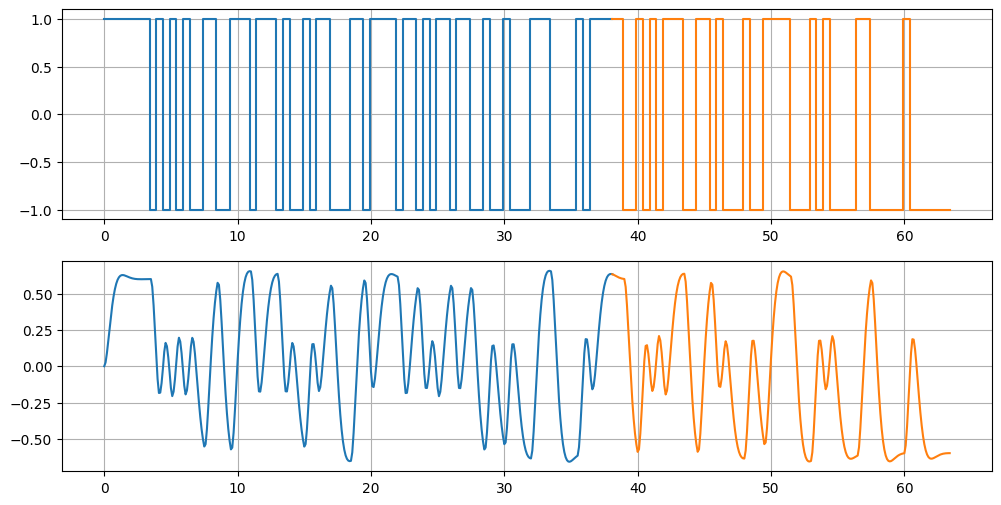

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[:Ni+1],u[:Ni+1])
plt.step(t[Ni:],u[Ni:])
plt.grid()
plt.subplot(212)
plt.plot(t[:Ni+1],y[:Ni+1])
plt.plot(t[Ni:],y[Ni:])
plt.grid()
plt.show()

In [ ]:
# Matriz de regressão:
nb = 2
na = 2
ni = np.arange(na,Ni+na)
M = np.zeros((Ni,na+nb+1))

# Para regressores de y:
for l in np.arange(0,na):
  M[:,l] = -y[ni-l-1]

# Para regressores de u:
for l in np.arange(0,nb+1):
  M[:,na+l] = u[ni-l]

In [ ]:
# Mínimos quadrados
x = np.linalg.inv(M.T@M)@M.T@y[ni]
x

array([-1.55706819e+00,  6.38904684e-01,  1.96836270e-16,  2.63842043e-02,
        2.27176942e-02])

In [ ]:
# Modelo identificado:
Ai = [1, x[0], x[1]]
Bi = [x[2], x[3], x[4]]

Gi = sg.TransferFunction(Bi,Ai, dt = Ts)

# Resposta do modelo identificado:
yp = np.squeeze(sg.dlsim(Gi, u, t = t)[1])

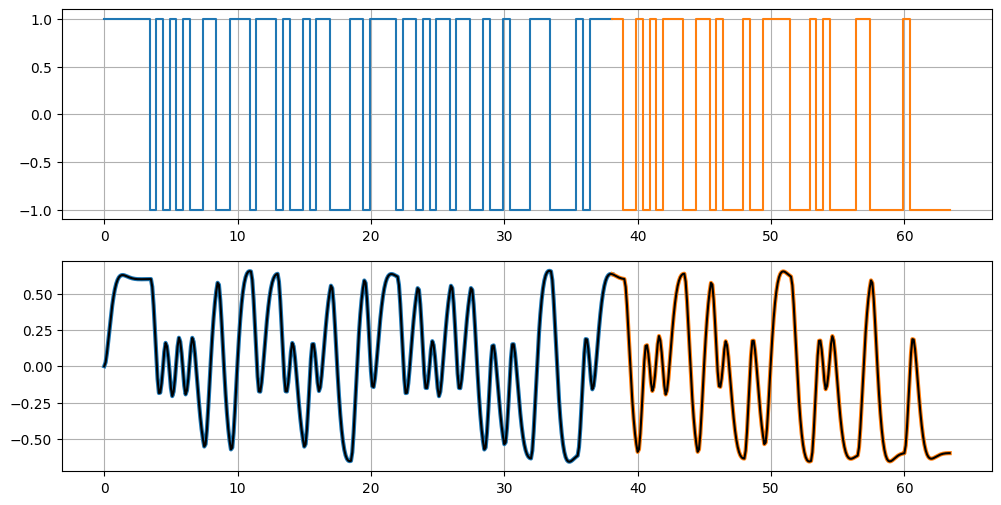

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[:Ni+1],u[:Ni+1])
plt.step(t[Ni:],u[Ni:])
plt.grid()
plt.subplot(212)
plt.plot(t[:Ni+1],y[:Ni+1],linewidth = 3.0)
plt.plot(t[Ni:],y[Ni:],linewidth = 3.0)
plt.plot(t,yp,'k')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(y, yp)

print(R2)

1.0
